### Initializations

In [41]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from tensorflow.keras import utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers.legacy import SGD, Adam, RMSprop
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import os
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from PIL import Image, ImageEnhance
from tensorflow.keras.models import Model

### Data loading and pre-processing

In [2]:
#data: shuffled and split between train and test sets, loading and using the MNIST dataset
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Print the shapes of the input and output data
print("Training data input shape: " , x_train_mnist.shape)
print("Training data output shape: " , y_train_mnist.shape)
print("Test data input shape: " , x_test_mnist.shape)
print("Test data ouput shape: " , y_test_mnist.shape)

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000,)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000,)


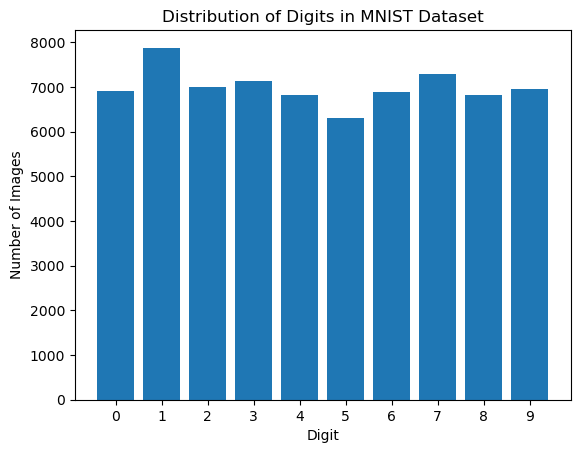

In [4]:
# Combine the training and test sets to create the entire dataset
x_mnist = np.concatenate((x_train_mnist, x_test_mnist), axis=0)
y_mnist = np.concatenate((y_train_mnist, y_test_mnist), axis=0)

# Count the occurrences of each digit in the entire dataset
digit_counts = np.bincount(y_mnist)

# Create a bar plot (histogram) to visualize the distribution
digits = np.arange(10)
plt.bar(digits, digit_counts, tick_label=digits)
plt.xlabel('Digit')
plt.ylabel('Number of Images')
plt.title('Distribution of Digits in MNIST Dataset')
plt.show()

In [5]:
# Convert labels to one-hot encoded format
num_classes = len(np.unique(y_train_mnist))
Y_train = to_categorical(y_train_mnist, num_classes)
Y_test = to_categorical(y_test_mnist, num_classes)

# Normalize pixel values to the range [0, 1]
X_train = x_train_mnist.astype('float32') / 255.0
X_test = x_test_mnist.astype('float32') / 255.0

In [6]:
# Print the shapes of the input and output data
print("Training data input shape: " , X_train.shape)
print("Training data output shape: " , Y_train.shape)
print("Test data input shape: " , X_test.shape)
print("Test data ouput shape: " , Y_test.shape)

Training data input shape:  (60000, 28, 28)
Training data output shape:  (60000, 10)
Test data input shape:  (10000, 28, 28)
Test data ouput shape:  (10000, 10)


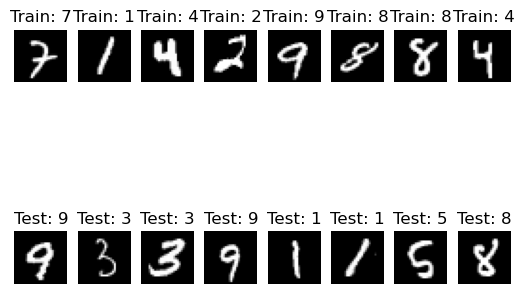

In [7]:
# Print a sample of the full dataset
num_samples = 8  # Number of samples to display
random_indices_train = np.random.choice(len(X_train), num_samples, replace=False)
random_indices_test = np.random.choice(len(X_test), num_samples, replace=False)
sample_images_train = X_train[random_indices_train]
sample_labels_train = Y_train[random_indices_train]
sample_images_test = X_test[random_indices_test]
sample_labels_test = Y_test[random_indices_test]

for i in range(num_samples):
    image_train = sample_images_train[i]
    label_train = np.argmax(sample_labels_train[i])
    image_test = sample_images_test[i]
    label_test = np.argmax(sample_labels_test[i])

    plt.subplot(2, num_samples, i+1)
    plt.imshow(image_train.squeeze(), cmap='gray')
    plt.title("Train: {}".format(label_train))
    plt.axis('off')
    
    plt.subplot(2, num_samples, num_samples+i+1)
    plt.imshow(image_test.squeeze(), cmap='gray')
    plt.title("Test: {}".format(label_test))
    plt.axis('off')

plt.show()

### Pre-trained CNNs

In [31]:
#training constants
BATCH_SIZE = 128
N_EPOCH = 40
N_CLASSES = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.2

print('Main variables initialised.')

Main variables initialised.


### LeNet-5

In [32]:
def create_lenet5_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
    model.add(AveragePooling2D((2, 2)))
    
    # Block 2
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(AveragePooling2D((2, 2)))
    
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

#### 1. Adam, 0.001

Epoch 1/40
375/375 [==============================] - 3s 6ms/step - loss: 0.4370 - accuracy: 0.8726 - val_loss: 0.1649 - val_accuracy: 0.9494
Epoch 2/40
375/375 [==============================] - 2s 5ms/step - loss: 0.1356 - accuracy: 0.9585 - val_loss: 0.1167 - val_accuracy: 0.9639
Epoch 3/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0958 - accuracy: 0.9705 - val_loss: 0.0886 - val_accuracy: 0.9729
Epoch 4/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0763 - accuracy: 0.9764 - val_loss: 0.0790 - val_accuracy: 0.9758
Epoch 5/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0643 - accuracy: 0.9802 - val_loss: 0.0725 - val_accuracy: 0.9794
Epoch 6/40
375/375 [==============================] - 2s 6ms/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0623 - val_accuracy: 0.9799
Epoch 7/40
375/375 [==============================] - 2s 5ms/step - loss: 0.0483 - accuracy: 0.9853 - val_loss: 0.0606 - val_accuracy: 0.9822
Epoch 

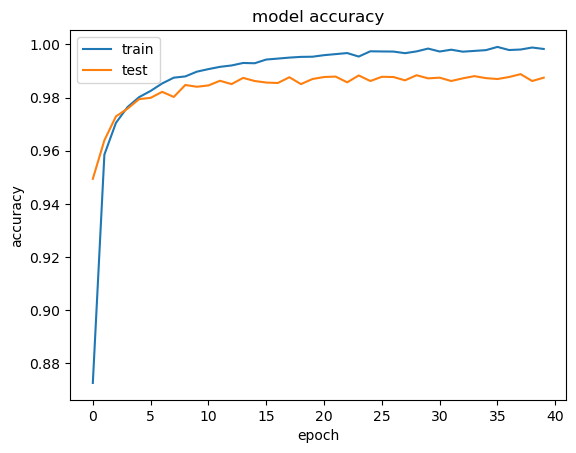

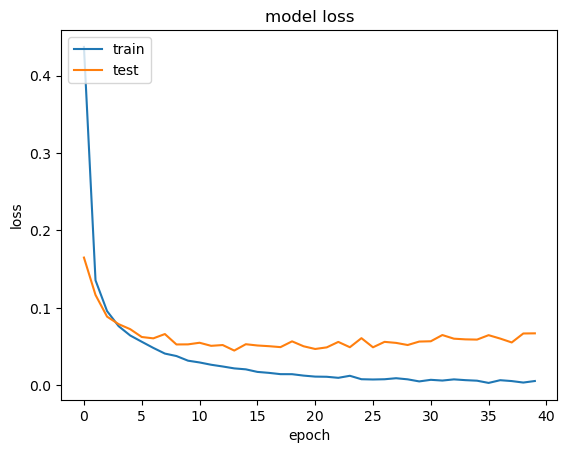

In [33]:
LEARN_RATE = 0.001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_lenet1 = create_lenet5_model()
model_lenet1.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_lenet1 = model_lenet1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_lenet1, test_acc_lenet1 = model_lenet1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_lenet1)

# list all data in history
print(history_lenet1.history.keys())
# summarize history for accuracy
plt.plot(history_lenet1.history['accuracy'])
plt.plot(history_lenet1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lenet1.history['loss'])
plt.plot(history_lenet1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 2. Adam, 0.0001

Epoch 1/40
375/375 [==============================] - 3s 7ms/step - loss: 1.2453 - accuracy: 0.6457 - val_loss: 0.4621 - val_accuracy: 0.8703
Epoch 2/40
375/375 [==============================] - 2s 5ms/step - loss: 0.4122 - accuracy: 0.8815 - val_loss: 0.3309 - val_accuracy: 0.9047
Epoch 3/40
375/375 [==============================] - 2s 5ms/step - loss: 0.3206 - accuracy: 0.9074 - val_loss: 0.2668 - val_accuracy: 0.9240
Epoch 4/40
375/375 [==============================] - 2s 6ms/step - loss: 0.2664 - accuracy: 0.9225 - val_loss: 0.2257 - val_accuracy: 0.9362
Epoch 5/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2282 - accuracy: 0.9337 - val_loss: 0.2003 - val_accuracy: 0.9438
Epoch 6/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2015 - accuracy: 0.9410 - val_loss: 0.1829 - val_accuracy: 0.9484
Epoch 7/40
375/375 [==============================] - 2s 6ms/step - loss: 0.1812 - accuracy: 0.9467 - val_loss: 0.1683 - val_accuracy: 0.9503
Epoch 

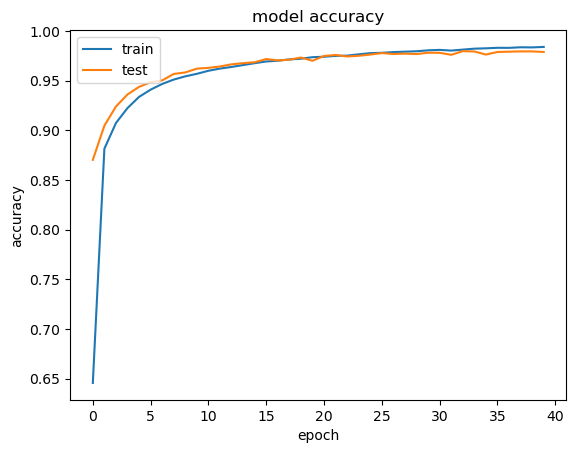

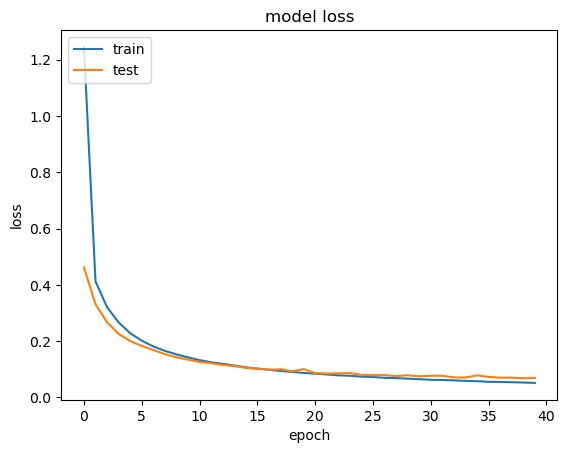

In [34]:
LEARN_RATE = 0.0001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_lenet2 = create_lenet5_model()
model_lenet2.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_lenet2 = model_lenet2.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_lenet2, test_acc_lenet2 = model_lenet2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_lenet2)

# list all data in history
print(history_lenet2.history.keys())
# summarize history for accuracy
plt.plot(history_lenet2.history['accuracy'])
plt.plot(history_lenet2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lenet2.history['loss'])
plt.plot(history_lenet2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3. RMSprop, 0.0001

Epoch 1/40
375/375 [==============================] - 3s 6ms/step - loss: 1.3571 - accuracy: 0.6613 - val_loss: 0.5618 - val_accuracy: 0.8487
Epoch 2/40
375/375 [==============================] - 2s 6ms/step - loss: 0.4609 - accuracy: 0.8676 - val_loss: 0.3549 - val_accuracy: 0.8961
Epoch 3/40
375/375 [==============================] - 2s 5ms/step - loss: 0.3550 - accuracy: 0.8956 - val_loss: 0.2932 - val_accuracy: 0.9118
Epoch 4/40
375/375 [==============================] - 2s 5ms/step - loss: 0.3035 - accuracy: 0.9097 - val_loss: 0.2662 - val_accuracy: 0.9218
Epoch 5/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2688 - accuracy: 0.9196 - val_loss: 0.2371 - val_accuracy: 0.9312
Epoch 6/40
375/375 [==============================] - 2s 5ms/step - loss: 0.2415 - accuracy: 0.9283 - val_loss: 0.2145 - val_accuracy: 0.9360
Epoch 7/40
375/375 [==============================] - 2s 6ms/step - loss: 0.2192 - accuracy: 0.9341 - val_loss: 0.1951 - val_accuracy: 0.9428
Epoch 

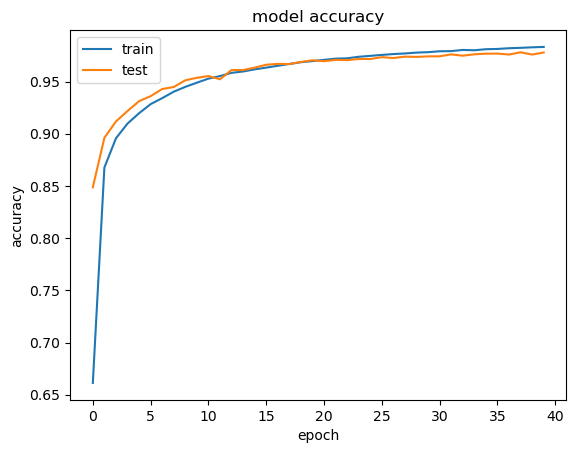

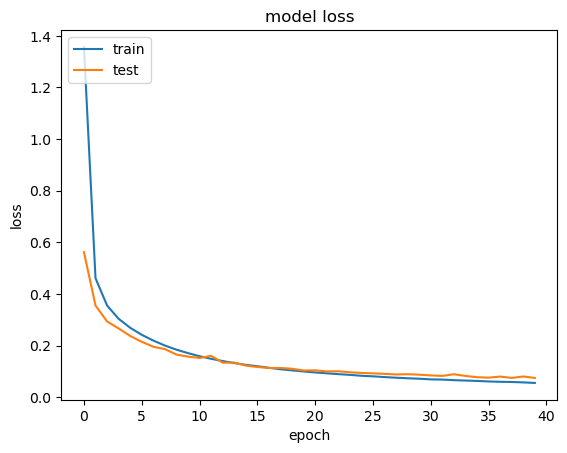

In [35]:
LEARN_RATE = 0.0001
OPTIM = RMSprop(learning_rate=LEARN_RATE)

model_lenet3 = create_lenet5_model()
model_lenet3.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_lenet3 = model_lenet3.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_lenet3, test_acc_lenet3 = model_lenet3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_lenet3)

# list all data in history
print(history_lenet3.history.keys())
# summarize history for accuracy
plt.plot(history_lenet3.history['accuracy'])
plt.plot(history_lenet3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_lenet3.history['loss'])
plt.plot(history_lenet3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### AlexNet

In [29]:
def create_alexnet_model():
    model = Sequential()
    
    # Block 1
    model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # Block 2
    model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # Block 3
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

#### 1. Adam, 0.001

Epoch 1/40
375/375 [==============================] - 8s 19ms/step - loss: 0.7039 - accuracy: 0.7345 - val_loss: 0.1351 - val_accuracy: 0.9663
Epoch 2/40
375/375 [==============================] - 7s 18ms/step - loss: 0.1095 - accuracy: 0.9725 - val_loss: 0.1068 - val_accuracy: 0.9712
Epoch 3/40
375/375 [==============================] - 7s 18ms/step - loss: 0.0842 - accuracy: 0.9784 - val_loss: 0.0806 - val_accuracy: 0.9795
Epoch 4/40
375/375 [==============================] - 7s 18ms/step - loss: 0.0710 - accuracy: 0.9822 - val_loss: 0.0963 - val_accuracy: 0.9758
Epoch 5/40
375/375 [==============================] - 7s 18ms/step - loss: 0.0649 - accuracy: 0.9835 - val_loss: 0.0823 - val_accuracy: 0.9798
Epoch 6/40
375/375 [==============================] - 7s 19ms/step - loss: 0.0586 - accuracy: 0.9856 - val_loss: 0.0985 - val_accuracy: 0.9797
Epoch 7/40
375/375 [==============================] - 7s 20ms/step - loss: 0.0496 - accuracy: 0.9877 - val_loss: 0.0882 - val_accuracy: 0.9801

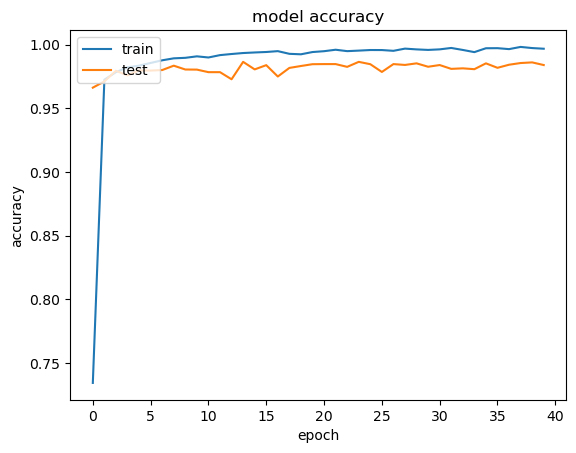

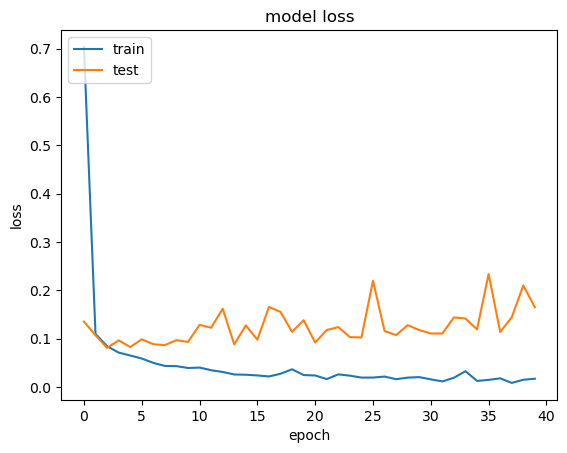

In [36]:
LEARN_RATE = 0.001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_alex1 = create_alexnet_model()
model_alex1.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_alex1 = model_alex1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_alex1, test_acc_alex1 = model_alex1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_alex1)

# list all data in history
print(history_alex1.history.keys())
# summarize history for accuracy
plt.plot(history_alex1.history['accuracy'])
plt.plot(history_alex1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_alex1.history['loss'])
plt.plot(history_alex1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 2. Adam, 0.0001

Epoch 1/40
375/375 [==============================] - 8s 20ms/step - loss: 0.7252 - accuracy: 0.7417 - val_loss: 0.1959 - val_accuracy: 0.9429
Epoch 2/40
375/375 [==============================] - 7s 19ms/step - loss: 0.1680 - accuracy: 0.9508 - val_loss: 0.1048 - val_accuracy: 0.9684
Epoch 3/40
375/375 [==============================] - 7s 19ms/step - loss: 0.1127 - accuracy: 0.9659 - val_loss: 0.0861 - val_accuracy: 0.9732
Epoch 4/40
375/375 [==============================] - 7s 20ms/step - loss: 0.0787 - accuracy: 0.9756 - val_loss: 0.0738 - val_accuracy: 0.9775
Epoch 5/40
375/375 [==============================] - 7s 20ms/step - loss: 0.0584 - accuracy: 0.9819 - val_loss: 0.0771 - val_accuracy: 0.9772
Epoch 6/40
375/375 [==============================] - 7s 19ms/step - loss: 0.0513 - accuracy: 0.9839 - val_loss: 0.0667 - val_accuracy: 0.9808
Epoch 7/40
375/375 [==============================] - 7s 19ms/step - loss: 0.0431 - accuracy: 0.9866 - val_loss: 0.0773 - val_accuracy: 0.9753

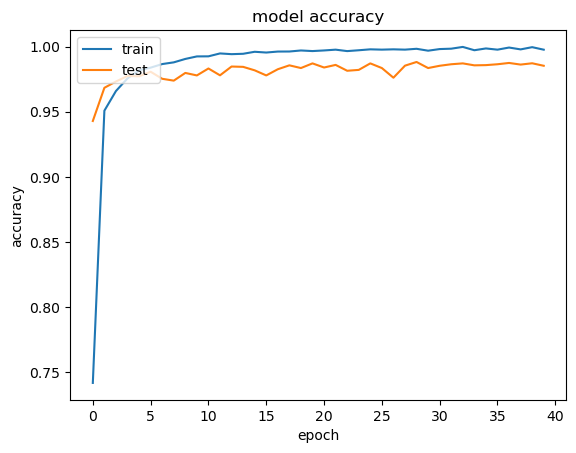

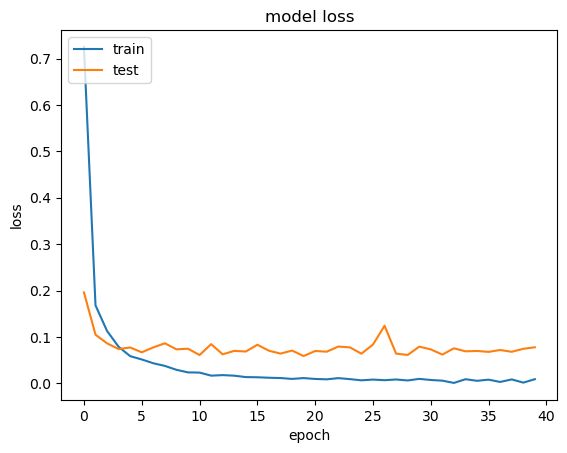

In [37]:
LEARN_RATE = 0.0001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_alex2 = create_alexnet_model()
model_alex2.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_alex2 = model_alex2.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_alex2, test_acc_alex2 = model_alex2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_alex2)

# list all data in history
print(history_alex2.history.keys())
# summarize history for accuracy
plt.plot(history_alex2.history['accuracy'])
plt.plot(history_alex2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_alex2.history['loss'])
plt.plot(history_alex2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3. RMSprop, 0.0001

Epoch 1/40
375/375 [==============================] - 10s 24ms/step - loss: 1.0021 - accuracy: 0.6309 - val_loss: 0.3889 - val_accuracy: 0.8766
Epoch 2/40
375/375 [==============================] - 9s 23ms/step - loss: 0.2124 - accuracy: 0.9358 - val_loss: 0.1391 - val_accuracy: 0.9585
Epoch 3/40
375/375 [==============================] - 8s 23ms/step - loss: 0.1124 - accuracy: 0.9669 - val_loss: 0.0928 - val_accuracy: 0.9728
Epoch 4/40
375/375 [==============================] - 9s 23ms/step - loss: 0.0768 - accuracy: 0.9774 - val_loss: 0.0787 - val_accuracy: 0.9788
Epoch 5/40
375/375 [==============================] - 9s 23ms/step - loss: 0.0569 - accuracy: 0.9833 - val_loss: 0.0633 - val_accuracy: 0.9828
Epoch 6/40
375/375 [==============================] - 9s 23ms/step - loss: 0.0449 - accuracy: 0.9868 - val_loss: 0.0823 - val_accuracy: 0.9782
Epoch 7/40
375/375 [==============================] - 9s 23ms/step - loss: 0.0349 - accuracy: 0.9897 - val_loss: 0.0901 - val_accuracy: 0.978

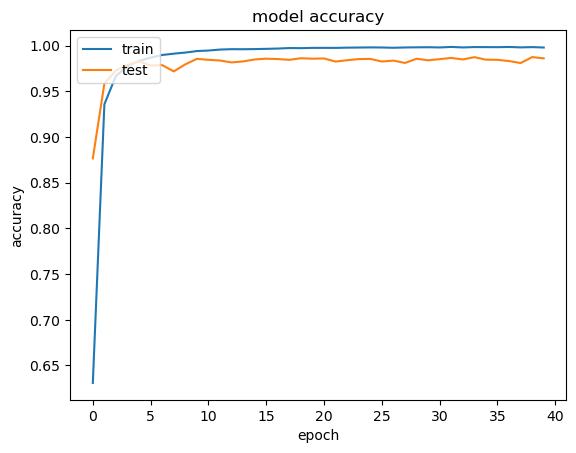

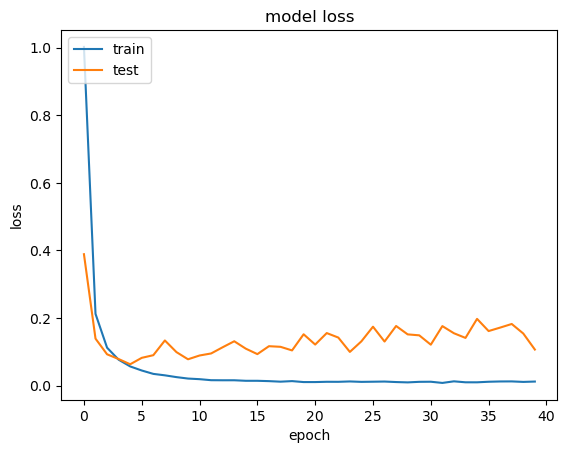

In [38]:
LEARN_RATE = 0.0001
OPTIM = RMSprop(learning_rate=LEARN_RATE)

model_alex3 = create_alexnet_model()
model_alex3.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_alex3 = model_alex3.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_alex3, test_acc_alex3 = model_alex3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_alex3)

# list all data in history
print(history_alex3.history.keys())
# summarize history for accuracy
plt.plot(history_alex3.history['accuracy'])
plt.plot(history_alex3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_alex3.history['loss'])
plt.plot(history_alex3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### ResNet18

In [42]:
def create_resnet18_model():
    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (7, 7), strides=(2, 2), padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((3, 3), strides=(2, 2), padding='same'))

    # Block 2
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Block 3
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Block 4
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(256, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    # Block 5
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(512, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2), padding='same'))

    model.add(AveragePooling2D((1, 1)))
    model.add(Flatten())
    model.add(Dense(10, activation='softmax'))

    return model


#### 1. Adam, 0.001

Epoch 1/40
375/375 [==============================] - 24s 18ms/step - loss: 0.1430 - accuracy: 0.9553 - val_loss: 3.2483 - val_accuracy: 0.3941
Epoch 2/40
375/375 [==============================] - 5s 14ms/step - loss: 0.0557 - accuracy: 0.9824 - val_loss: 0.1291 - val_accuracy: 0.9668
Epoch 3/40
375/375 [==============================] - 5s 14ms/step - loss: 0.0431 - accuracy: 0.9869 - val_loss: 1.0005 - val_accuracy: 0.7694
Epoch 4/40
375/375 [==============================] - 5s 14ms/step - loss: 0.0367 - accuracy: 0.9888 - val_loss: 0.1601 - val_accuracy: 0.9615
Epoch 5/40
375/375 [==============================] - 5s 14ms/step - loss: 0.0289 - accuracy: 0.9910 - val_loss: 0.4959 - val_accuracy: 0.8761
Epoch 6/40
375/375 [==============================] - 5s 15ms/step - loss: 0.0297 - accuracy: 0.9906 - val_loss: 0.1817 - val_accuracy: 0.9550
Epoch 7/40
375/375 [==============================] - 6s 15ms/step - loss: 0.0236 - accuracy: 0.9931 - val_loss: 0.0584 - val_accuracy: 0.983

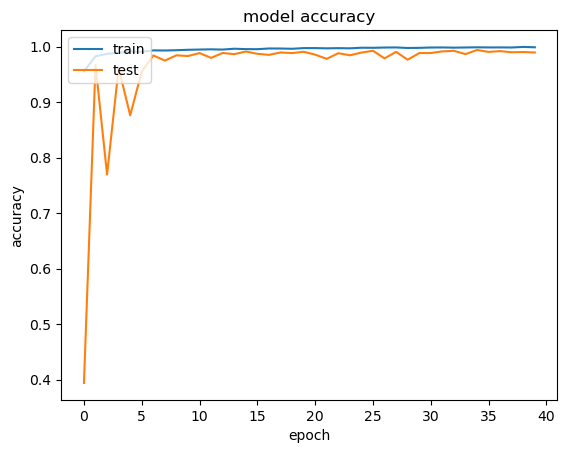

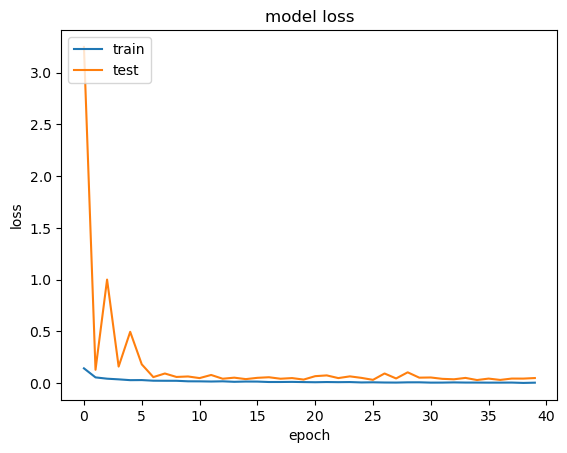

In [43]:
LEARN_RATE = 0.001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_resnet1 = create_resnet18_model()
model_resnet1.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_resnet1 = model_resnet1.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_resnet1, test_acc_resnet1 = model_resnet1.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_resnet1)

# list all data in history
print(history_resnet1.history.keys())
# summarize history for accuracy
plt.plot(history_resnet1.history['accuracy'])
plt.plot(history_resnet1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_resnet1.history['loss'])
plt.plot(history_resnet1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 2. Adam, 0.0001

Epoch 1/40
375/375 [==============================] - 7s 16ms/step - loss: 0.2182 - accuracy: 0.9315 - val_loss: 2.1991 - val_accuracy: 0.1334
Epoch 2/40
375/375 [==============================] - 5s 14ms/step - loss: 0.0554 - accuracy: 0.9822 - val_loss: 0.0834 - val_accuracy: 0.9728
Epoch 3/40
375/375 [==============================] - 6s 15ms/step - loss: 0.0313 - accuracy: 0.9903 - val_loss: 0.0600 - val_accuracy: 0.9821
Epoch 4/40
375/375 [==============================] - 6s 15ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.0836 - val_accuracy: 0.9749
Epoch 5/40
375/375 [==============================] - 6s 17ms/step - loss: 0.0176 - accuracy: 0.9942 - val_loss: 0.0836 - val_accuracy: 0.9763
Epoch 6/40
375/375 [==============================] - 6s 15ms/step - loss: 0.0158 - accuracy: 0.9946 - val_loss: 0.0560 - val_accuracy: 0.9824
Epoch 7/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0143 - accuracy: 0.9955 - val_loss: 0.0628 - val_accuracy: 0.9825

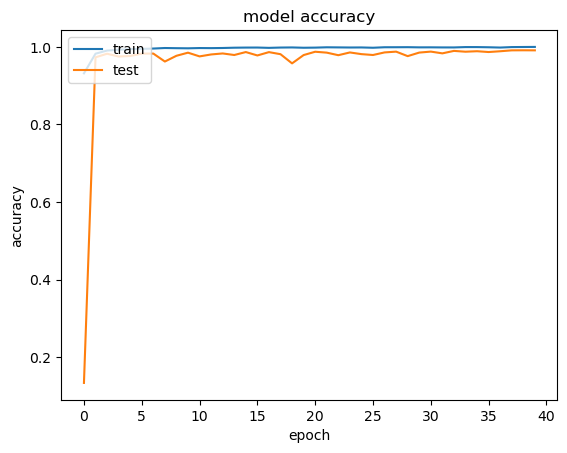

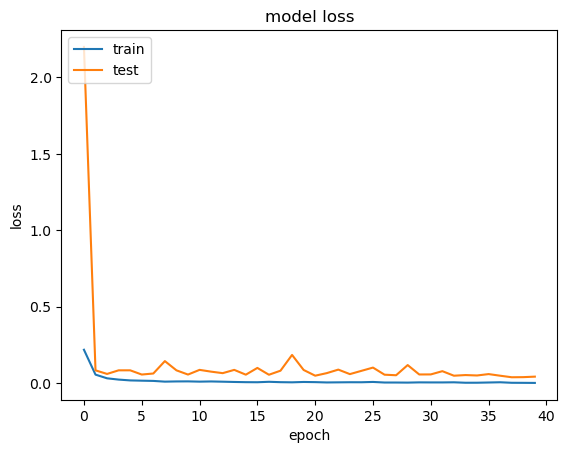

In [44]:
LEARN_RATE = 0.0001
OPTIM = Adam(learning_rate=LEARN_RATE)

model_resenet2 = create_resnet18_model()
model_resenet2.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_resenet2 = model_resenet2.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_resenet2, test_acc_resenet2 = model_resenet2.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_resenet2)

# list all data in history
print(history_resenet2.history.keys())
# summarize history for accuracy
plt.plot(history_resenet2.history['accuracy'])
plt.plot(history_resenet2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_resenet2.history['loss'])
plt.plot(history_resenet2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#### 3. RMSprop, 0.0001

Epoch 1/40
375/375 [==============================] - 9s 17ms/step - loss: 0.1856 - accuracy: 0.9419 - val_loss: 3.9527 - val_accuracy: 0.1061
Epoch 2/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0602 - accuracy: 0.9811 - val_loss: 0.0966 - val_accuracy: 0.9740
Epoch 3/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0375 - accuracy: 0.9881 - val_loss: 0.0727 - val_accuracy: 0.9780
Epoch 4/40
375/375 [==============================] - 6s 17ms/step - loss: 0.0279 - accuracy: 0.9910 - val_loss: 0.0689 - val_accuracy: 0.9790
Epoch 5/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0210 - accuracy: 0.9932 - val_loss: 0.0797 - val_accuracy: 0.9768
Epoch 6/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0170 - accuracy: 0.9942 - val_loss: 0.0611 - val_accuracy: 0.9831
Epoch 7/40
375/375 [==============================] - 6s 16ms/step - loss: 0.0153 - accuracy: 0.9950 - val_loss: 0.0670 - val_accuracy: 0.9813

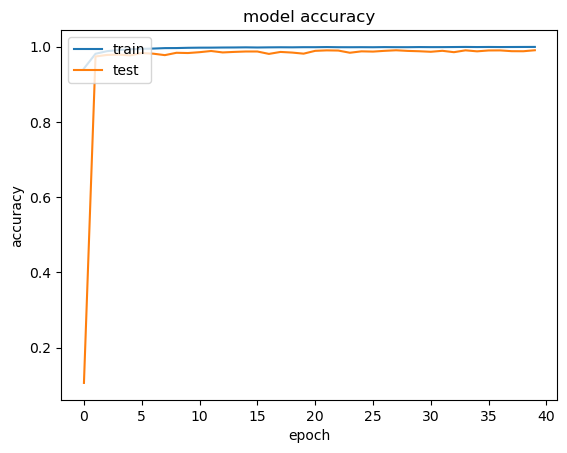

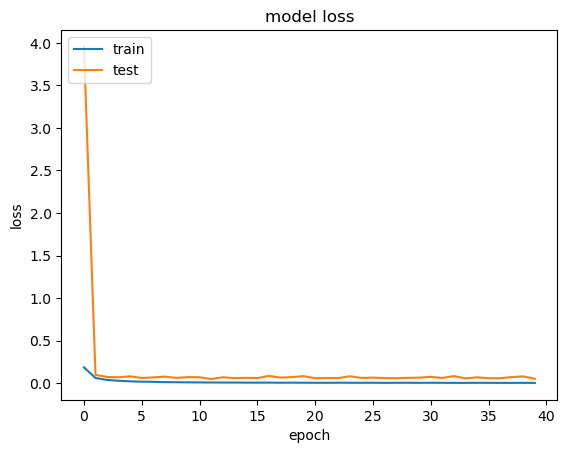

In [45]:
LEARN_RATE = 0.0001
OPTIM = RMSprop(learning_rate=LEARN_RATE)

model_resnet3 = create_resnet18_model()
model_resnet3.compile(loss='categorical_crossentropy', optimizer=OPTIM, metrics=['accuracy'])
history_resnet3 = model_resnet3.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=N_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

# Evaluate the model on the test set
test_loss_resnet3, test_acc_resnet3 = model_resenet3.evaluate(X_test, Y_test)
print('Test accuracy:', test_acc_resnet3)

# list all data in history
print(history_resnet3.history.keys())
# summarize history for accuracy
plt.plot(history_resnet3.history['accuracy'])
plt.plot(history_resnet3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history_resnet3.history['loss'])
plt.plot(history_resnet3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Predictions

In [49]:
# Function to make predictions on a single sample image
def predict_single_image(model, sample_image):
    sample_image = np.array(sample_image).reshape(1, 28, 28, 1).astype('float32') / 255.0
    prediction = model.predict(sample_image)[0]
    predicted_label = np.argmax(prediction)
    confidence_percentage = np.max(prediction) * 100
    return predicted_label, confidence_percentage

1/1 [==============================] - 0s 24ms/step


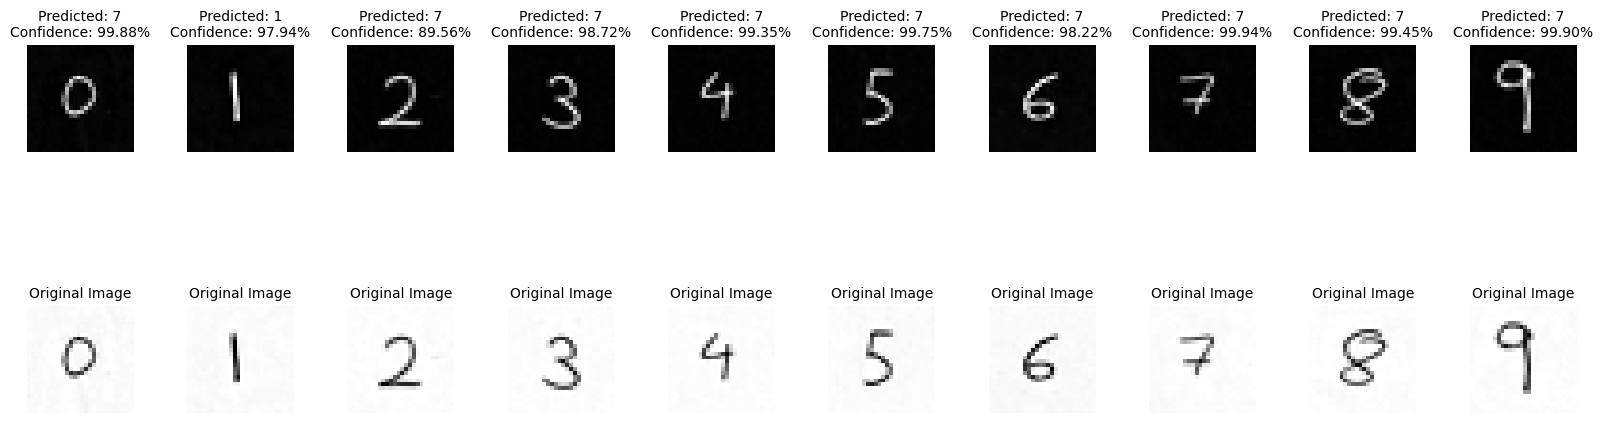

In [47]:
# Sample images for prediction
sample_image_paths = [
    "/kaggle/input/single-digits/0.png",
    "/kaggle/input/single-digits/1.png",
    "/kaggle/input/single-digits/2.png",
    "/kaggle/input/single-digits/3.png",
    "/kaggle/input/single-digits/4.png",
    "/kaggle/input/single-digits/5.png",
    "/kaggle/input/single-digits/6.png",
    "/kaggle/input/single-digits/7.png",
    "/kaggle/input/single-digits/8.png",
    "/kaggle/input/single-digits/9.png",
]

# Set the common figure size for all images and number of columns for the subplot
num_images = len(sample_image_paths)
fig, axs = plt.subplots(2, num_images, figsize=(num_images * 2, 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Call the function to display each image with its prediction
for i, image_path in enumerate(sample_image_paths):
    # Load and preprocess the image
    sample_image = Image.open(image_path).convert("L")  # Convert to grayscale
    sample_image = sample_image.resize((28, 28))  # Resize to MNIST image size (28x28)

    # Convert to black background with white digit
    sample_image_array = 255 - np.array(sample_image)

    # Make predictions on the enhanced image
    predicted_label, confidence_percentage = predict_single_image(model_resenet3, sample_image_array)

    # Display the enhanced image with black background and clearer white digit
    axs[0, i].imshow(sample_image_array, cmap='gray')
    axs[0, i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence_percentage:.2f}%", fontsize=10)
    axs[0, i].axis('off')

    # Display the original image below the enhanced image
    axs[1, i].imshow(sample_image, cmap='gray')
    axs[1, i].set_title("Original Image", fontsize=10)
    axs[1, i].axis('off')

# Rotate x-axis tick labels to accommodate longer text
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()

In [50]:
# Function to make predictions on a single sample image
def predict_single_image(model, sample_image):
    sample_image = np.array(sample_image).reshape(1, 28, 28, 1).astype('float32') / 255.0
    prediction = model.predict(sample_image)[0]
    predicted_label = np.argmax(prediction)
    confidence_percentage = np.max(prediction) * 100
    return predicted_label, confidence_percentage

# Function to enhance the image (increase contrast and brightness)
def enhance_image(sample_image_array):
    enhancer = ImageEnhance.Contrast(Image.fromarray(sample_image_array))
    enhanced_image_array = np.array(enhancer.enhance(2.0))  # Increase contrast (you can adjust the enhancement factor as needed)
    return enhanced_image_array

1/1 [==============================] - 0s 24ms/step


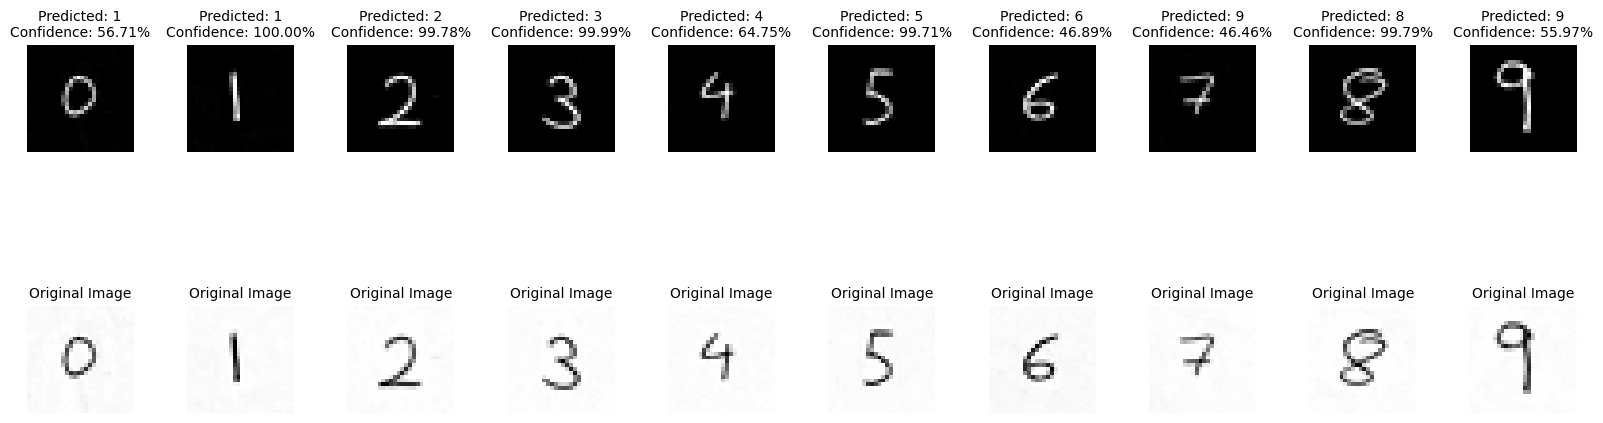

In [56]:
# Sample images for prediction
sample_image_paths = [
    "/kaggle/input/single-digits/0.png",
    "/kaggle/input/single-digits/1.png",
    "/kaggle/input/single-digits/2.png",
    "/kaggle/input/single-digits/3.png",
    "/kaggle/input/single-digits/4.png",
    "/kaggle/input/single-digits/5.png",
    "/kaggle/input/single-digits/6.png",
    "/kaggle/input/single-digits/7.png",
    "/kaggle/input/single-digits/8.png",
    "/kaggle/input/single-digits/9.png",
]

# Set the common figure size for all images and number of columns for the subplot
num_images = len(sample_image_paths)
fig, axs = plt.subplots(2, num_images, figsize=(num_images * 2, 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Call the function to display each image with its prediction
for i, image_path in enumerate(sample_image_paths):
    # Load and preprocess the image
    sample_image = Image.open(image_path).convert("L")  # Convert to grayscale
    sample_image = sample_image.resize((28, 28))  # Resize to MNIST image size (28x28)

    # Convert to black background with white digit
    sample_image_array = 255 - np.array(sample_image)

    # Enhance the image (increase contrast and brightness)
    enhanced_image_array = enhance_image(sample_image_array)

    # Make predictions on the enhanced image
    predicted_label, confidence_percentage = predict_single_image(model_resnet2, enhanced_image_array)

    # Display the enhanced image with black background and clearer white digit
    axs[0, i].imshow(enhanced_image_array, cmap='gray')
    axs[0, i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence_percentage:.2f}%", fontsize=10)
    axs[0, i].axis('off')

    # Display the original image below the enhanced image
    axs[1, i].imshow(sample_image, cmap='gray')
    axs[1, i].set_title("Original Image", fontsize=10)
    axs[1, i].axis('off')

# Rotate x-axis tick labels to accommodate longer text
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()



1/1 [==============================] - 0s 35ms/step


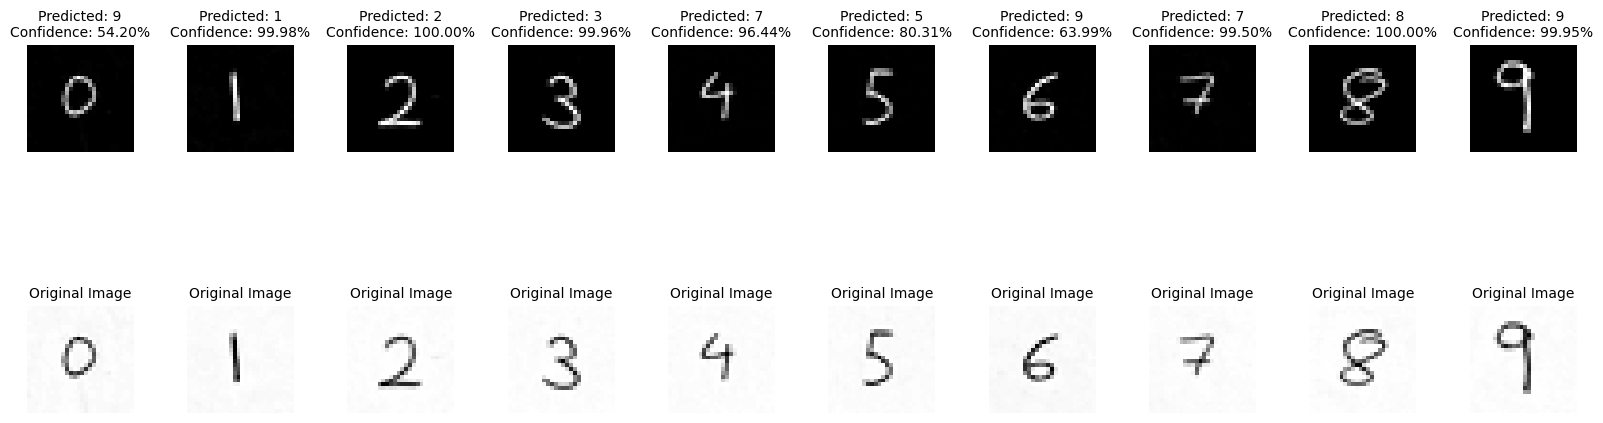

In [58]:
# Sample images for prediction
sample_image_paths = [
    "/kaggle/input/single-digits/0.png",
    "/kaggle/input/single-digits/1.png",
    "/kaggle/input/single-digits/2.png",
    "/kaggle/input/single-digits/3.png",
    "/kaggle/input/single-digits/4.png",
    "/kaggle/input/single-digits/5.png",
    "/kaggle/input/single-digits/6.png",
    "/kaggle/input/single-digits/7.png",
    "/kaggle/input/single-digits/8.png",
    "/kaggle/input/single-digits/9.png",
]

# Set the common figure size for all images and number of columns for the subplot
num_images = len(sample_image_paths)
fig, axs = plt.subplots(2, num_images, figsize=(num_images * 2, 6))

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.3)

# Call the function to display each image with its prediction
for i, image_path in enumerate(sample_image_paths):
    # Load and preprocess the image
    sample_image = Image.open(image_path).convert("L")  # Convert to grayscale
    sample_image = sample_image.resize((28, 28))  # Resize to MNIST image size (28x28)

    # Convert to black background with white digit
    sample_image_array = 255 - np.array(sample_image)

    # Enhance the image (increase contrast and brightness)
    enhanced_image_array = enhance_image(sample_image_array)

    # Make predictions on the enhanced image
    predicted_label, confidence_percentage = predict_single_image(model_resnet3, enhanced_image_array)

    # Display the enhanced image with black background and clearer white digit
    axs[0, i].imshow(enhanced_image_array, cmap='gray')
    axs[0, i].set_title(f"Predicted: {predicted_label}\nConfidence: {confidence_percentage:.2f}%", fontsize=10)
    axs[0, i].axis('off')

    # Display the original image below the enhanced image
    axs[1, i].imshow(sample_image, cmap='gray')
    axs[1, i].set_title("Original Image", fontsize=10)
    axs[1, i].axis('off')

# Rotate x-axis tick labels to accommodate longer text
for ax in axs.flat:
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)

plt.show()




In [59]:
model_resnet2.save('my_best_model3.h5')